# Encrypt and decrypt the text

In [11]:
import encrypt
import decrypt
import re


with open('./data/krakatit.txt', 'r', encoding='utf-8') as file:
    text = file.read().replace(' ', '_').replace('\n', '_').upper()  # Replace spaces and newlines with underscores
text = re.sub(r'[^A-Z_]', '', text)  # Allow underscores

key = "TJCSMD_WOXPIRNLEYBFVZAHKQGU"

# Show a sample of the text and its encryption
sample = text[:500]  # Take first x characters as a sample
print('Original text:', sample)
encrypted = encrypt.encrypt(sample, key)
# Show the encrypted text
print('Encrypted text:', encrypted)
# Decrypt the encrypted text
decrypted = decrypt.decrypt(encrypted, key)
print('Decrypted text:', decrypted)

Original text: KAREL_CAPEK_KRAKATIT__I_S_VECEREM_ZHOUSTLA_MLHA_SYCHRAVEHO_DNE_JE_TI_JAKO_BY_SES_PROTLACOVAL_RIDKOU_VLHKOU_HMOTOU_JEZ_SE_ZA_TEBOU_NEODVRATNE_ZAVIRA_CHTEL_BYS_BYT_DOMA_DOMA_U_SVE_LAMPY_V_KRABICI_CTYR_STEN_NIKDY_SES_NECITIL_TAK_OPUSTEN_PROKOP_SI_RAZI_CESTU_PO_NABREZI_MRAZI_HO_A_CELO_MA_ZVLHLE_POTEM_SLABOSTI_CHTEL_BY_SI_SEDNOUT_TADY_NA_TE_MOKRE_LAVICCE_ALE_BOJI_SE_STRAZNIKU_ZDA_SE_MU_ZE_SE_MOTA_ANO_U_STAROMESTSKYCH_MLYNU_SE_MU_NEKDO_VYHNUL_OBLOUKEM_JAKO_OPILEMU_NYNI_TEDY_VYNAKLADA_VESKERU_SILU_ABY_
Encrypted text: PTBMIUCTEMPUPBTPTVOVUUOUFUAMCMBMRUGWLZFVITURIWTUFQCWBTAMWLUSNMUXMUVOUXTPLUJQUFMFUEBLVITCLATIUBOSPLZUAIWPLZUWRLVLZUXMGUFMUGTUVMJLZUNMLSABTVNMUGTAOBTUCWVMIUJQFUJQVUSLRTUSLRTUZUFAMUITREQUAUPBTJOCOUCVQBUFVMNUNOPSQUFMFUNMCOVOIUVTPULEZFVMNUEBLPLEUFOUBTGOUCMFVZUELUNTJBMGOURBTGOUWLUTUCMILURTUGAIWIMUELVMRUFITJLFVOUCWVMIUJQUFOUFMSNLZVUVTSQUNTUVMURLPBMUITAOCCMUTIMUJLXOUFMUFVBTGNOPZUGSTUFMURZUGMUFMURLVTUTNLUZUFVTBLRMFVFPQCWURIQNZUFMURZUNMPSLUAQWNZIULJILZPMRUXTPLULEOIMRZUNQNOU

# Choosing file for decryption

In [20]:
with open('./data/text_1000_sample_20_ciphertext.txt', 'r', encoding='utf-8') as f:
    encrypted_text = f.read()

# Generate the bigram matrix

In [21]:
import bigram

# Break the encryption using M-H algorithm

### Improve the decryption using smart key

In [29]:
import metropolis
import pandas as pd
from decrypt import decrypt

# Load reference bigram matrix (must be created via bigram.py first!)
reference_matrix = pd.read_csv('relativni_bigramova_matice.csv', index_col=0).values
reference_matrix += 1e-10
# Run Metropolis-Hastings on the encrypted sample
best_key, score_history = metropolis.metropolis_hastings(
    ciphertext=encrypted_text,
    reference_matrix=reference_matrix,
    iterations=20000
    
)

# Show results
print("Most likely key found:", best_key)
print("Decrypted text using this key:")
print(decrypt(encrypted_text, best_key))

Most likely key found: PTNRWLFGHXDVUEJOAZQCYS_MIKB
Decrypted text using this key:
BEZELI_VSTRIC_KDEZTO_PRINCEZNA_NA_NEHO_JEN_RYCHLE_ZKOUMAVE_POHLEDLA_PRES_HLAVU_CINSKEHO_VYSLANCE_PROKOP_SI_MYSLEL_ZE_HO_PRIJDE_UVITAT_ALE_KDYZ_VIDEL_ZE_SE_ZASTAVILA_S_DVEMA_STARSIMI_AZ_PO_PUPEK_DEKOLETOVANYMI_PANICKAMI_ZAMRACIL_SE_A_COUVAL_DO_KOUTA_NEOCHOTNE_SE_UKLANEJE_NARAMNYM_OSOBNOSTEM_KTERYM_HO_PAN_CARSON_PREDSTAVOVAL_POD_TITULEM_SLAVNEHO_UCENCE_NASEHO_SLAVNEHO_HOSTA_A_TAK_DALE_JAK_SE_ZDALO_PREVZAL_TU_PAN_CARSON_ROLI_HOLZOVU_NEBOT_NEHNUL_SE_OD_PROKOPA_NA_KROK_CIM_DAL_TIM_SE_PROKOP_NUDIL_ZOUFALEJI_VTLACIL_SE_UZ_DOCELA_DO_KOUTA_A_SKAREDIL_NA_CELY_SVET_TED_MLUVI_PRINCEZNA_S_NEJAKYMI_ARCIHODNOSTARI_JEDEN_Z_NICH_JE_DOKONCE_ADMIRAL_A_DRUHY_VELIKE_ZAHRANICNI_ZVIRE_PRINCEZNA_SE_KVAPNE_PODIVA_STRANOU_KDE_SE_KABONI_PROKOP_ALE_V_TU_CHVILI_K_NI_PRISTUPUJE_PRETENDENT_JISTEHO_ZRUSENEHO_TRUNU_A_ODVADI_JI_NA_OPACNOU_STRANU_NU_JA_PUJDU_DOMU_BRUCI_PROKOP_A_ROZHODUJE_SE_V_HLOUBI_SVE_CERNE_DUSE_ZE_DO_TRI_DNU_UDELA_NOVY_

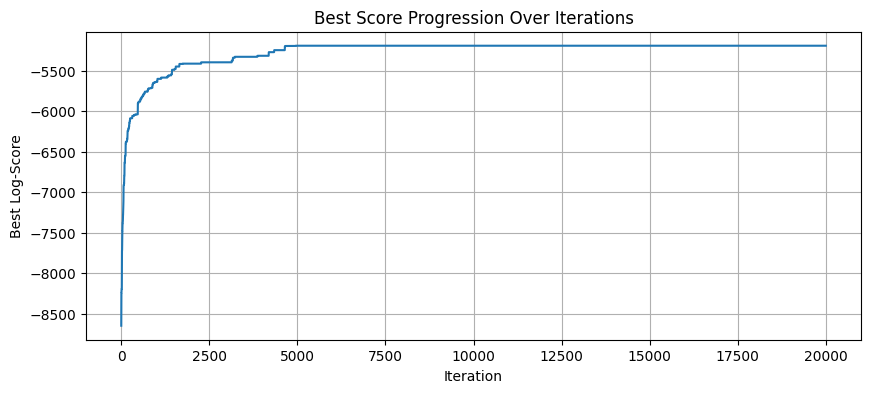

In [24]:
import matplotlib.pyplot as plt

# Plot score over iterations
plt.figure(figsize=(10, 4))
plt.plot(score_history)
plt.title('Best Score Progression Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Best Log-Score')
plt.grid(True)
plt.show()